# Cifar10 Image Classification 

This is a notebook using Convolutional Neural Networks to classify CIFAR-10 32x32 pixel colour images into 10 classes. Those learning may kind this useful.

The purpose of this notebook was to teach myself how to use keras for CNNs. Most of this code is taken from David Foster's book on Generative Deep Learning.

In [2]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar10

In [3]:
NUM_CLASSES = 10

In [5]:
# Loads the CIFAR-10 dataset.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check numpy array shapes
for i in [x_train, y_train, x_test, y_test]:
    print(i.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
# Normalising pixel data from 0 to 255 to be between -1 to 1, the range where neural networks work the best.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Changes the integer labelling (np.unique(y_train) = [0,..., 9]) of a target to a one-hot-encoding.
# For example, the one-hot coding of class 0 is [1, 0, ..., 0].
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [15]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same')(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same')(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


$$ Categorical Cross Entropy = - \frac{1}{N}\sum_{i=1}^{N} [y_{i} \cdot log(p_{i}) + (1- y_{i})\cdot log(1 - p_{i})] $$

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics = ['accuracy'])

In [21]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 286us/step - loss: 2.0588 - acc: 0.2696 - val_loss: 14.0575 - val_acc: 0.1242
Epoch 2/10
50000/50000 [==============================] - 13s 267us/step - loss: 1.9341 - acc: 0.3260 - val_loss: 13.3133 - val_acc: 0.1686
Epoch 3/10
50000/50000 [==============================] - 13s 253us/step - loss: 1.8642 - acc: 0.3538 - val_loss: 12.5328 - val_acc: 0.2165
Epoch 4/10
50000/50000 [==============================] - 12s 247us/step - loss: 1.8379 - acc: 0.3648 - val_loss: 12.3620 - val_acc: 0.2275
Epoch 5/10
50000/50000 [==============================] - 14s 274us/step - loss: 1.8268 - acc: 0.3687 - val_loss: 12.3196 - val_acc: 0.2288
Epoch 6/10
50000/50000 [==============================] - 13s 259us/step - loss: 1.8175 - acc: 0.3752 - val_loss: 12.1632 - val_acc: 0.2384
Epoch 7/10
50000/50000 [==============================] - 13s 267us/step - loss: 1.8132 - acc: 0.3742 - val_lo

In [22]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 1s 97us/step


[11.480059051513672, 0.27919999659061434]

In [23]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

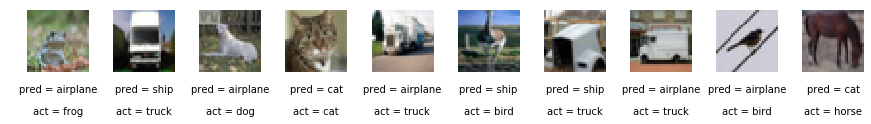

In [25]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


# With Batch Normalization

If the weights in your network become too large, this is a sign your network is suffering from the exploding gradients problem. To prevent this Batch Normalization normalizes the weights across the batch, which reduces the problem. 

We also use Dropout layers to prevent overfitting.

Lets see how it does!

In [26]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics = ['accuracy'])

In [28]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 304s 6ms/step - loss: 1.5674 - acc: 0.4512 - val_loss: 12.0109 - val_acc: 0.2508
Epoch 2/10
50000/50000 [==============================] - 390s 8ms/step - loss: 1.1465 - acc: 0.5965 - val_loss: 12.5893 - val_acc: 0.2166
Epoch 3/10
50000/50000 [==============================] - 301s 6ms/step - loss: 1.0141 - acc: 0.6470 - val_loss: 10.7330 - val_acc: 0.3275
Epoch 4/10
50000/50000 [==============================] - 317s 6ms/step - loss: 0.9262 - acc: 0.6760 - val_loss: 11.8748 - val_acc: 0.2600
Epoch 5/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.8726 - acc: 0.6951 - val_loss: 10.9166 - val_acc: 0.3178
Epoch 6/10
50000/50000 [==============================] - 287s 6ms/step - loss: 0.8225 - acc: 0.7142 - val_loss: 11.6491 - val_acc: 0.2742
Epoch 7/10
50000/50000 [==============================] - 287s 6ms/step - loss: 0.7785 - acc: 0.7282 - val_loss: 11.

In [29]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

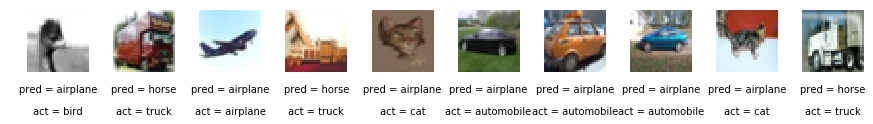

In [30]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)